# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.24 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [7]:
agent1 = Agent(state_size=state_size * 2, action_size=action_size)
agent2 = Agent(state_size=state_size * 2, action_size=action_size)

In [8]:
def ddpg(max_episodes=5000, max_steps=1000):
    scores_deque = deque(maxlen=100)
    scores = []

    for episode in range(1, max_episodes + 1):
        agent1.reset()
        agent2.reset()
        episode_score = np.zeros(2)

        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        state = np.reshape(state, (1, -1))
        for step in range(max_steps):

            action1 = agent1.act(state, add_noise=True)
            action2 = agent2.act(state, add_noise=True)

            action = [action1, action2]
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            next_state = np.reshape(next_state, (1, -1))
            rewards = env_info.rewards
            dones = env_info.local_done

            episode_score += rewards

            agent1.step(state, action1, rewards[0], next_state, dones[0])
            agent2.step(state, action2, rewards[1], next_state, dones[1])

            state = next_state

            if np.any(dones):
                break

        max_score = np.max(episode_score)
        scores.append(max_score)
        scores_deque.append(max_score)
        avg_score = np.mean(scores_deque)

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, avg_score), end="", flush=True)
        
        if episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, avg_score))

        if avg_score >= 0.5:
            print('\rGoal reached: Episode {}\tAverage Score: {:.2f}'.format(episode, avg_score))
            torch.save(agent1.actor_local.state_dict(), 'agent1_best_actor.pth')
            torch.save(agent1.critic_local.state_dict(), 'agent1_best_critic.pth')
            torch.save(agent2.actor_local.state_dict(), 'agent2_best_actor.pth')
            torch.save(agent2.critic_local.state_dict(), 'agent2_best_critic.pth')
            break

    return scores

scores = ddpg()

Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.03
Episode 300	Average Score: 0.01
Episode 400	Average Score: 0.02
Episode 500	Average Score: 0.04
Episode 600	Average Score: 0.05
Episode 700	Average Score: 0.05
Episode 800	Average Score: 0.08
Episode 900	Average Score: 0.09
Episode 1000	Average Score: 0.08
Episode 1100	Average Score: 0.09
Episode 1200	Average Score: 0.11
Episode 1300	Average Score: 0.13
Episode 1400	Average Score: 0.24
Episode 1500	Average Score: 0.50
Goal reached: Episode 1500	Average Score: 0.50


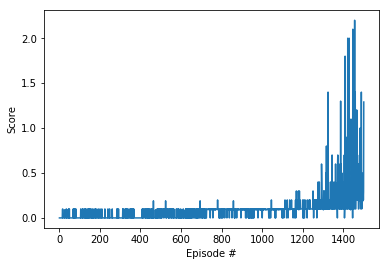

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
env.close()